**Stroke Detection Analysis**
*Smithi Mahendran*

**Introduction**
Stroke is a critical issue within the United States. The Center for Disease Control and Prevention ranks it as the 5th leading cause of death with 165,393 deaths in 2022. To put this into perspective, someone in the US has a stroke every 40 seconds, and someone dies of stroke every 3 minutes and 14 seconds (CDC, 2024). These statistics highlight the urgent need for awareness and treatment of stroke. By analyzing this dataset, I may be able to find early indicators of stroke and more accurately predict those who are higher risk.

Along with its devastating effects on public health, stroke can also significantly strain the economy. According to the CDC, “Stroke-related costs in the United States came to nearly $56.5 billion between 2018 and 2019”(CDC, 2024). This enormous figure includes direct costs, such as medical expenses and rehabilitation, along with indirect costs like lost productivity and long-term disability care. Because stroke is a leading cause of disability in the United States, there is often a significant financial burden felt by families of victims as they seek out long-term care.

Given its significant impact on the United States health and economy, tackling stroke became a major concern for me as I explored potential topics for this project. Additionally, I have had friends and family affected by this disease, and I wanted to utilize my skills to make a real-world impact.

In order to predict the onset of stroke, I will be going through the Data Science Lifecycle as following:

1. Data Collection
2. Data Processing
3. Exploratory Analysis & Data Visualization
4. Model: Analysis, Hypothesis Testing, & ML
5. Interpretation: Insight & Policy Decision

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#import kagglehub


Some of my major imports include Pandas, NumPy, Seaborn, SKLearn, and StatsModels.api. Pandas and NumPy are helpful tools for data analysis and manipulation, especially with large dataframes. Seaborn and MatPlotLib will help me visualize data into graphs and charts. SKLearn and StatsModels.api will allow me to run tests and regressions as I build models for the data.

**Step 1: Data Collection**

For data collection, I'll be using a dataset on Kaggle that can be found here: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

In [3]:
# Reading in the data into a dataframe
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head() #shows first few rows of dataframe

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**Step 2: Data Cleaning**

After getting the data, let's make sure it is clean.

In [4]:
pd.isnull(df).sum() #sums the number of null values in each column

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

There are 201 null values in the BMI column. These may cause problems moving forward, so I'll replace the null values with the mean BMI for the dataset.

In [5]:
df['bmi'].mean()

28.893236911794666

In [6]:
df.fillna({'bmi':28.89}, inplace = True) # replace all the null values with the mean

In [7]:
pd.isnull(df).sum() # to confirm if the change was effective

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [8]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.89,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1


I will rename the columns and also one-hot encode the 'ever_married' column. This will allow for cleaner visualizations and the ability for the categorical variables to better impact the regressions

In [9]:
df = df.rename(columns = {'gender': 'Gender', 'age' : 'Age', 'hypertension' : 'Hypertension', 'heart_disease' : 'Heart Disease',
                          'ever_married' : 'Previously Married', 'work_type' : 'Employment', 'Residence_type' : 'Residency',
                          'avg_glucose_level' : 'Average Glucose Level', 'bmi' : 'BMI', 'smoking_status' : 'Smoking Status',
                          'stroke' : 'Stroke'})

# Making a copy for later use
df_copy = df.copy()

df['Previously Married'] = df['Previously Married'].map({'Yes': 1, 'No': 0})

df.head()

,id,Gender,Age,Hypertension,Heart Disease,Previously Married,Employment,Residency,Average Glucose Level,BMI,Smoking Status,Stroke
0,9046,Male,67.0,0,1,1,Private,Urban,228.69,36.60,formerly smoked,1
1,51676,Female,61.0,0,0,1,Self-employed,Rural,202.21,28.89,never smoked,1
2,31112,Male,80.0,0,1,1,Private,Rural,105.92,32.50,never smoked,1
3,60182,Female,49.0,0,0,1,Private,Urban,171.23,34.40,smokes,1
4,1665,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.00,never smoked,1


**Step 3: Exploratory Data Analysis**

Now that the data is cleaned, let's perform some data analysis. Through the data analysis, I must observe any features that are correlated with stroke.

In [10]:
min_value = df['Age'].min()
max_value = df['Age'].max()

print("Minimum value:", min_value)
print("Maximum value:", max_value)

Minimum value: 0.08
Maximum value: 82.0


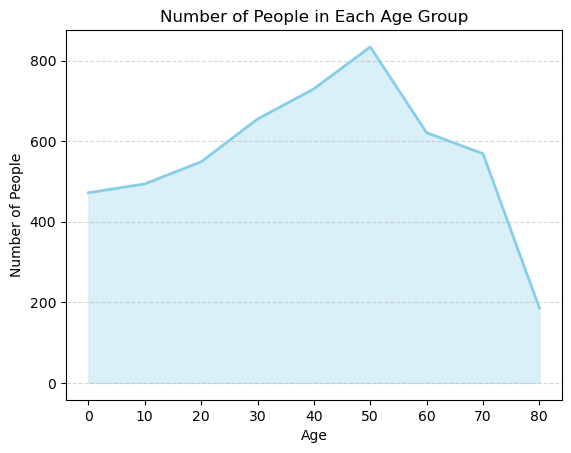

In [11]:
# Creating bins
bins = np.linspace(0, 90, 10, dtype=int)

# Calculate histogram
hist, bin_edges = np.histogram(df['Age'], bins=bins) # hist gives the count of people in each bin, bin_edges gives the start of each bin

# Plot graph
plt.plot(bin_edges[:-1], hist, color='skyblue', linewidth=2)
plt.fill_between(bin_edges[:-1], hist, color='skyblue', alpha=0.3)

# Adding labels and title
plt.title('Number of People in Each Age Group')
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


The data predominantly represents individuals in their middle ages, typically between the ages of 20 and 50. Moving forward, it will be important to keep in mind this disparity in participants by age and adjust my methods accordingly. Also observe that there are participants as young as infants and as old as 82.

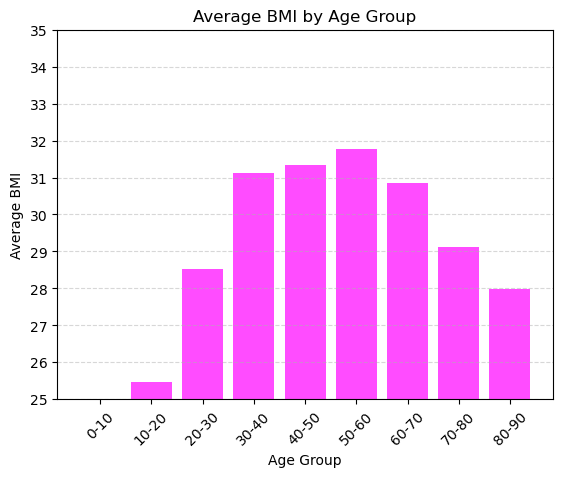

In [12]:
# Define bins for age groups
#print(df.columns)
bins = np.linspace(0, 90, 10, dtype=int)
age_groups = pd.cut(df['Age'], bins=bins)


# Calculate mean BMI for each age group
bmi_means = df.groupby(age_groups, observed=False)['BMI'].mean()


# Create a bar plot
plt.bar(range(len(bmi_means)), bmi_means, color='magenta', alpha=0.7)
plt.xticks(range(len(bmi_means)), [f'{group.left}-{group.right}' for group in bmi_means.index], rotation=45)
plt.title('Average BMI by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average BMI')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.ylim(25, 35)
plt.yticks(range(25, 36, 1))

# Display the plot
plt.show()

Observe that the average BMI is highest for ages 50-60. It slowly rises from 10-50, with a large jump between 10-20 and 20-30. Oddly enough, average BMI goes down for age groups after 60. This is somewhat confusing - why would older patients tend to have lower BMI? According to ChenMed, certain diseases and treatments for disease can cause a weight loss among seniors. Some elders are also unable to afford nutrient-rich foods.

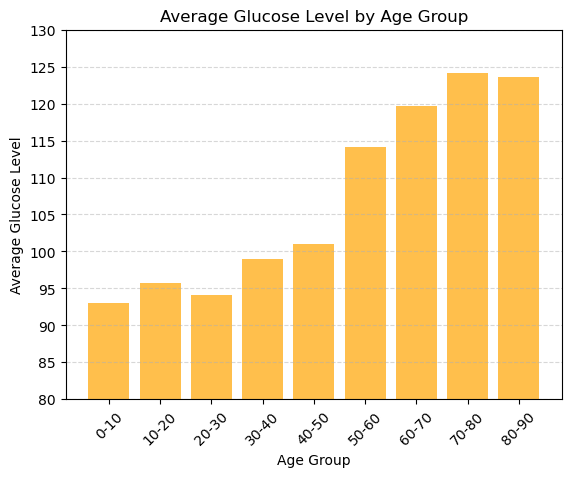

In [13]:
# Define bins for age groups
#print(df.columns)
bins = np.linspace(0, 90, 10, dtype=int)
age_groups = pd.cut(df['Age'], bins=bins)

# Calculate mean glucose level for each age group
glucose_means = df.groupby(age_groups, observed=False)['Average Glucose Level'].mean()

# Create a bar plot
plt.bar(range(len(glucose_means)), glucose_means, color='orange', alpha=0.7)
plt.xticks(range(len(glucose_means)), [f'{group.left}-{group.right}' for group in glucose_means.index], rotation=45)
plt.title('Average Glucose Level by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Glucose Level')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.ylim(80, 130)
plt.yticks(range(80, 131, 5))

# Display the plot
plt.show()

Observe that glucose level steadily increases through each age group. Ages 70-90 tend to have the highest glucose levels. As we age, our pancreas produces less insulin, explaining this rise over time.

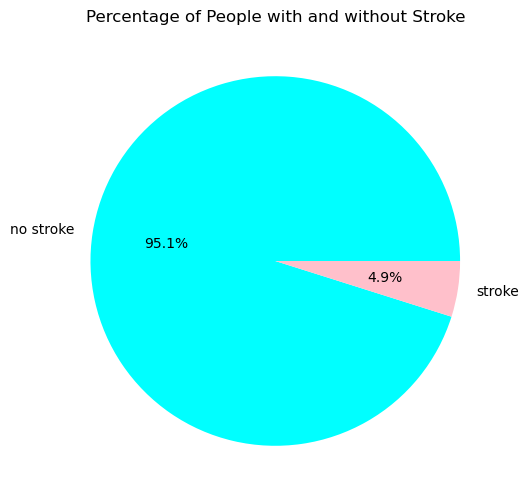

In [14]:
# Count the number of people with and without strokes
stroke_counts = df['Stroke'].value_counts()

# Calculate the percentage of people with and without strokes
total_people = len(df)
stroke_percentages = stroke_counts / total_people * 100

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(stroke_percentages, labels=['no stroke', 'stroke'], autopct='%1.1f%%', colors=['aqua', 'pink'])
plt.title('Percentage of People with and without Stroke')
plt.show()


The pie graph above depicts a clear class imbalance. If I had a model predict 95% of the time that a person doesn't have a stroke, then the model would be pretty accurate. This is something to keep in mind as I work to build a model that is highly accurate.

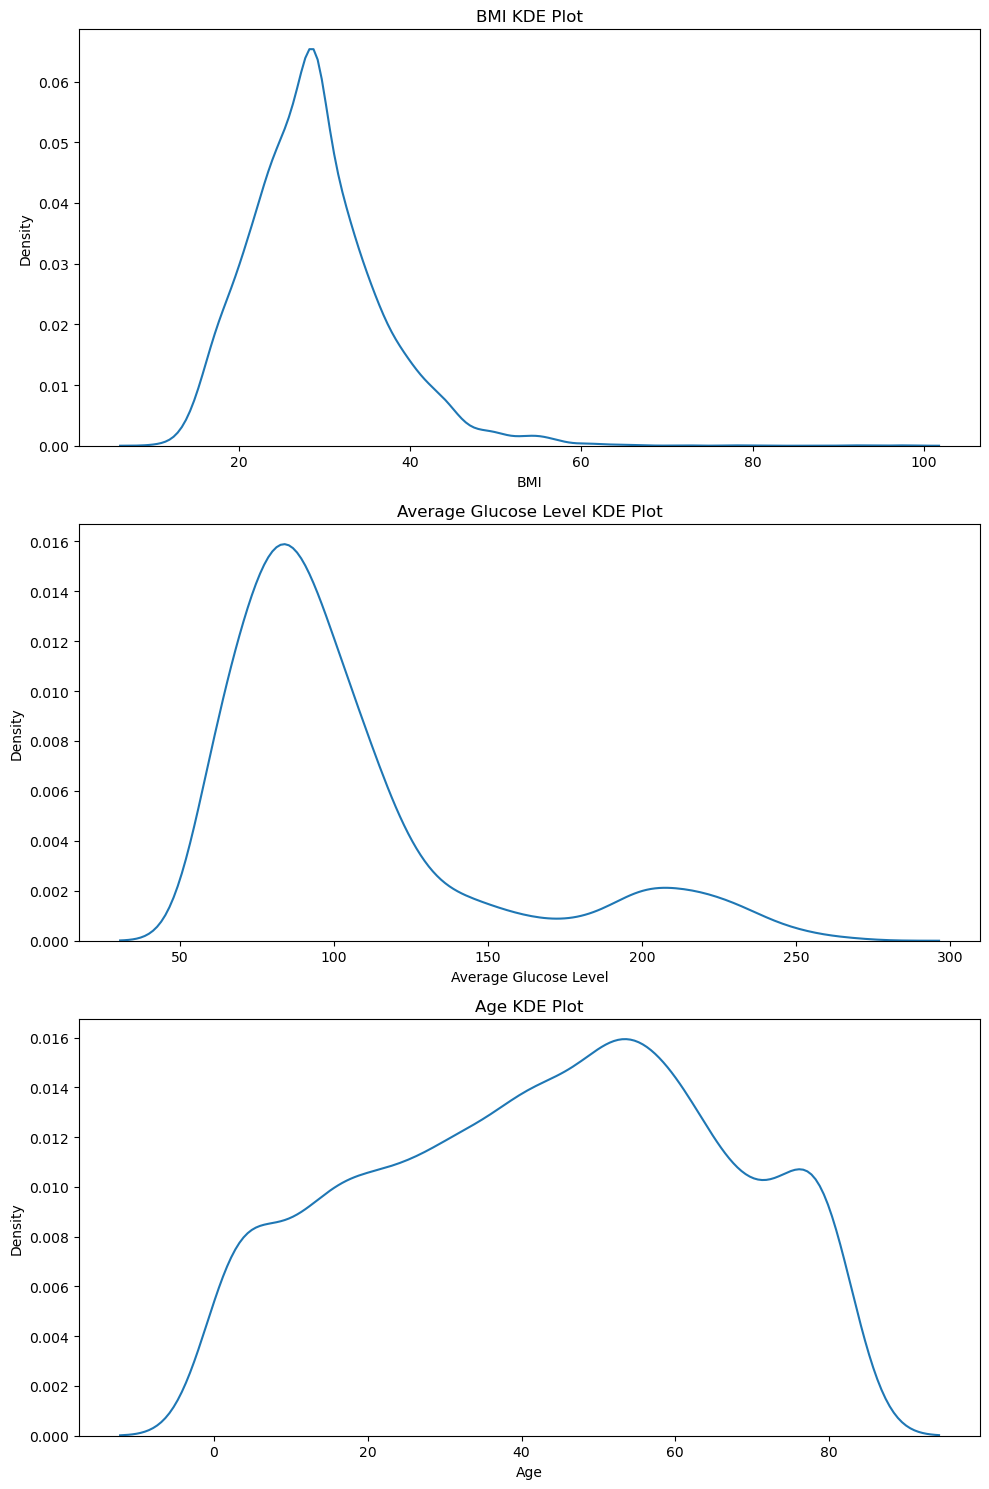

In [15]:
# Create a figure with three subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# KDE plot for BMI
sns.kdeplot(df['BMI'], ax=axes[0], label='BMI')
axes[0].set_title('BMI KDE Plot')
axes[0].set_xlabel('BMI')
axes[0].set_ylabel('Density')

# KDE plot for Average Glucose Level
sns.kdeplot(df['Average Glucose Level'], ax=axes[1], label='Average Glucose Level')
axes[1].set_title('Average Glucose Level KDE Plot')
axes[1].set_xlabel('Average Glucose Level')
axes[1].set_ylabel('Density')

# KDE plot for Age
sns.kdeplot(df['Age'], ax=axes[2], label='Age')
axes[2].set_title('Age KDE Plot')
axes[2].set_xlabel('Age')
axes[2].set_ylabel('Density')

plt.tight_layout()
plt.show()


I can clearly observe the distribution of the variables, but I can gain more information by plotting the distriubtion of the variables with respect to whether the observation is a stroke positive or negative.

First, let's explore age vs stroke.

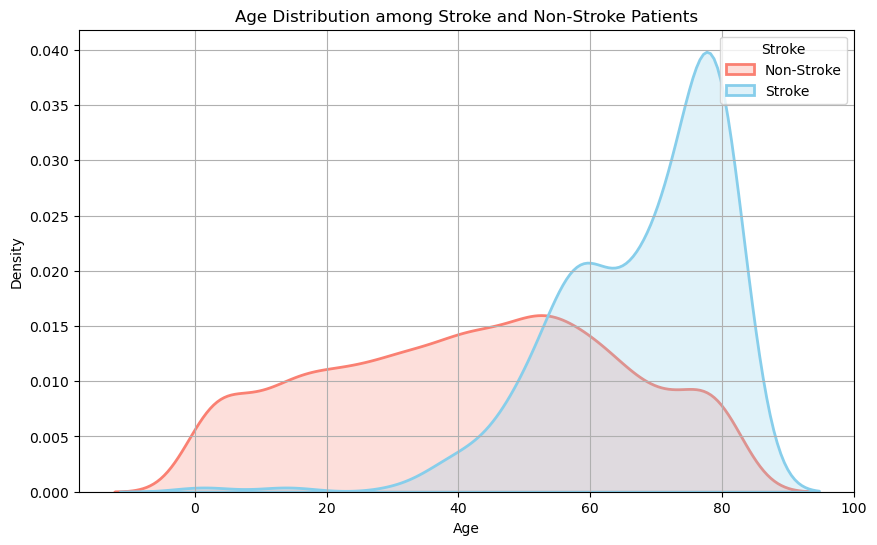

In [20]:
# Separate the data for stroke and non-stroke patients
stroke_data = df[df['Stroke'] == 1]['Age']
non_stroke_data = df[df['Stroke'] == 0]['Age']

# Plotting the distribution using Matplotlib
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['Stroke'] == 0]['Age'], fill=True, color='salmon', label='Non-Stroke', linewidth=2)
sns.kdeplot(data=df[df['Stroke'] == 1]['Age'], fill=True, color='skyblue', label='Stroke', linewidth=2)
plt.title('Age Distribution among Stroke and Non-Stroke Patients')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Stroke', loc='upper right')
plt.grid(True)
plt.show()

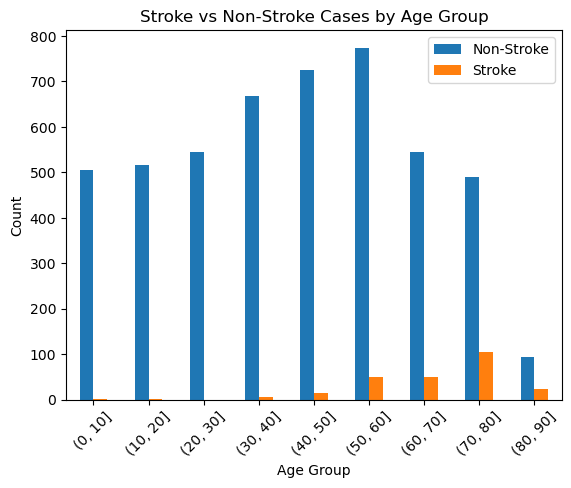

In [23]:
bins = np.linspace(0, 90, 10, dtype=int)

# Create 'Age Group' column based on age bins
df['Age Group'] = pd.cut(df['Age'], bins=bins)

# Group data by age group and stroke status
grouped = df.groupby(['Age Group', 'Stroke'], observed=False).size().unstack(fill_value=0)

# Plotting
grouped.plot(kind='bar', stacked=False)
plt.title('Stroke vs Non-Stroke Cases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(['Non-Stroke', 'Stroke'])
plt.show()



I can clearly observe that, generally, the older people in my dataset have reported a lot more strokes than younger people. Overall, the non-stroke cases still far outweight the stroke cases.

Next, let's explore glucose level vs stroke.

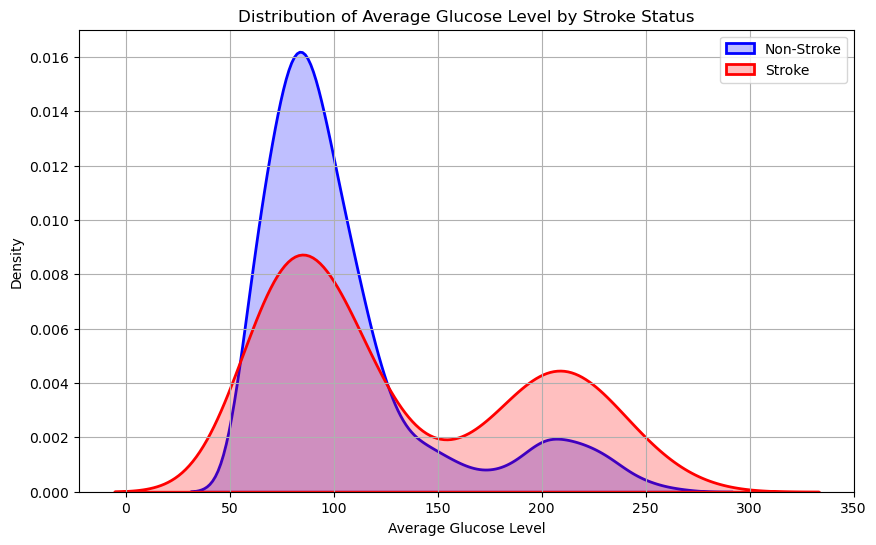

In [26]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['Stroke'] == 0]['Average Glucose Level'], fill=True, color='blue', label='Non-Stroke', linewidth=2)
sns.kdeplot(df[df['Stroke'] == 1]['Average Glucose Level'], fill=True, color='red', label='Stroke', linewidth=2)
plt.title('Distribution of Average Glucose Level by Stroke Status')
plt.xlabel('Average Glucose Level')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.show()

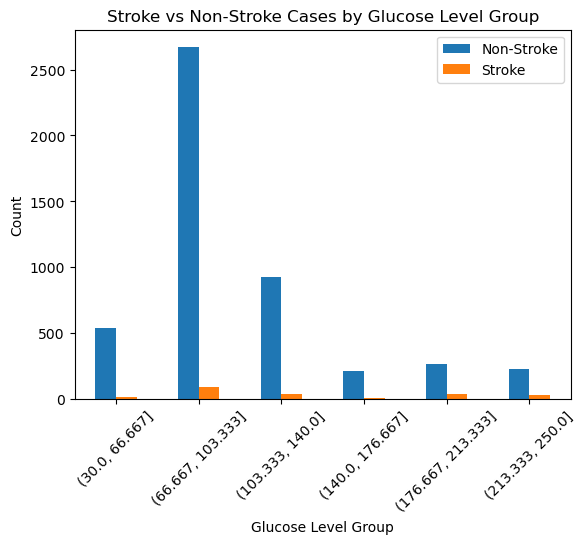

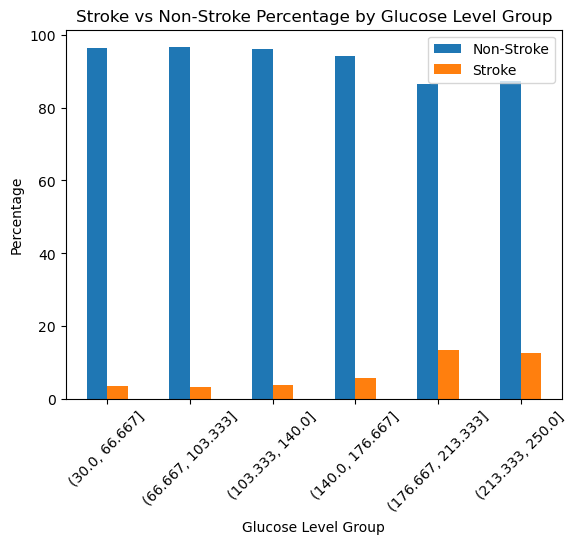

In [29]:
# Define glucose bins
glucose_bins = np.linspace(30, 250, 7)

# Create 'Glucose Level Group' column based on glucose bins
df['Glucose Level Group'] = pd.cut(df['Average Glucose Level'], bins=glucose_bins)

# Group data by glucose level group and stroke status
grouped = df.groupby(['Glucose Level Group', 'Stroke'], observed = False).size().unstack(fill_value=0)

# Plotting
grouped.plot(kind='bar', stacked=False)
plt.title('Stroke vs Non-Stroke Cases by Glucose Level Group')
plt.xlabel('Glucose Level Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(['Non-Stroke', 'Stroke'])
plt.show()

# Calculate stroke percentage
stroke_percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Plotting
stroke_percentages.plot(kind='bar', stacked=False)
plt.title('Stroke vs Non-Stroke Percentage by Glucose Level Group')
plt.xlabel('Glucose Level Group')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(['Non-Stroke', 'Stroke'])
plt.show()

I can observe that stroke can occur from any glucose level, but higher glucose levels tend to result in higher stroke percentages.

Lastly, let's explore BMI vs Stroke.

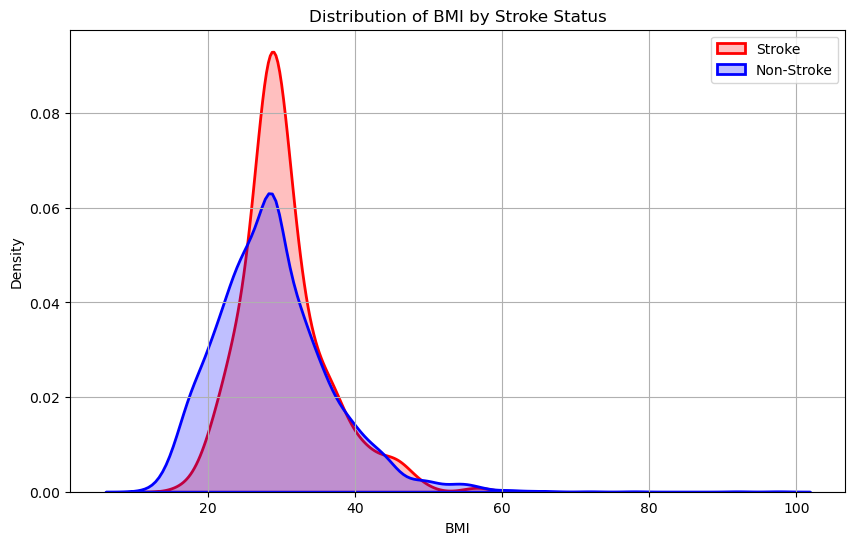

In [32]:
# Plotting
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['Stroke'] == 1]['BMI'], fill=True, color='red', label='Stroke', linewidth=2)
sns.kdeplot(df[df['Stroke'] == 0]['BMI'], fill=True, color='blue', label='Non-Stroke', linewidth=2)
plt.title('Distribution of BMI by Stroke Status')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.show()

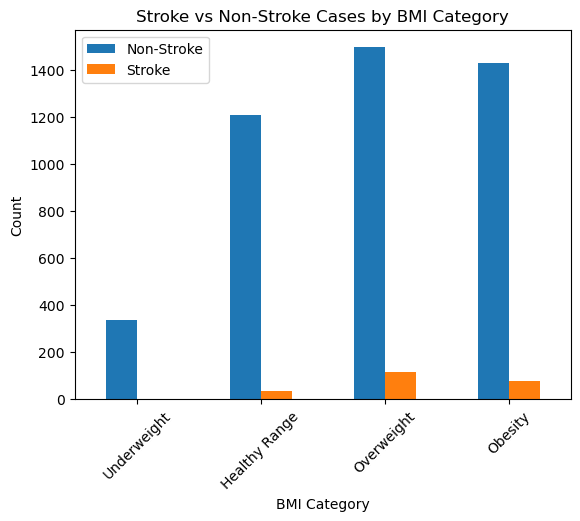

In [35]:
bins = [0, 18.5, 25, 30, 40]
labels = ['Underweight', 'Healthy Range', 'Overweight', 'Obesity']

# Bin the data
df['BMI Category'] = pd.cut(df['BMI'], bins=bins, labels=labels, right=False)

# Group data by BMI category and stroke status
grouped = df.groupby(['BMI Category', 'Stroke'], observed = False).size().unstack(fill_value=0)

# Plotting
grouped.plot(kind='bar', stacked=False)
plt.title('Stroke vs Non-Stroke Cases by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(['Non-Stroke', 'Stroke'])
plt.show()

This graph supports my observation above as we can clearly see that overweight and obesity contain majority of the stroke cases. Something that is puzzling is that a good number of overweight and obese participants have not experienced a stroke.

Now that I have analyzed the continuous data, lets take a look at the discrete data as well.

Discrete data: Hypertension, Heart Disease, Previously Married, Employment, Residency

Employment
Govt_job         5.022831
Never_worked     0.000000
Private          5.094017
Self-employed    7.936508
children         0.291121
Name: Stroke, dtype: float64


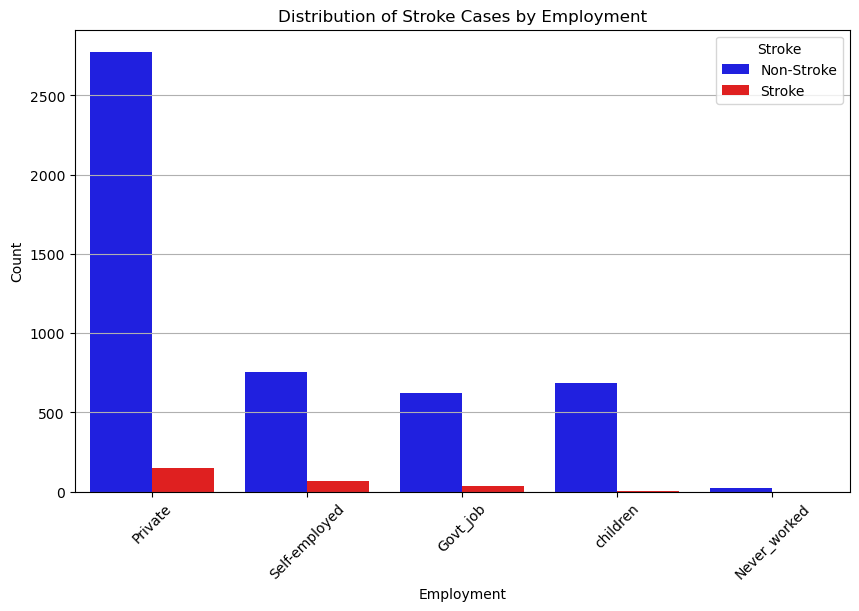

In [39]:

stroke_percentages = df.groupby('Employment')['Stroke'].mean() * 100
print(stroke_percentages)

plt.figure(figsize=(10, 6))
sns.countplot(x='Employment', hue='Stroke', data=df, palette={0: 'blue', 1: 'red'})
plt.title('Distribution of Stroke Cases by Employment')
plt.xlabel('Employment')
plt.ylabel('Count')
plt.grid(axis='y')
plt.legend(title='Stroke', loc='upper right', labels=['Non-Stroke', 'Stroke'])
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed

plt.show()

I can observe that most of the stroke cases, occurred in the private sector. However, in the group of self-employed individuals, the proportion of stroke cases relative to the total number of individuals is higher compared to those in the private sector.

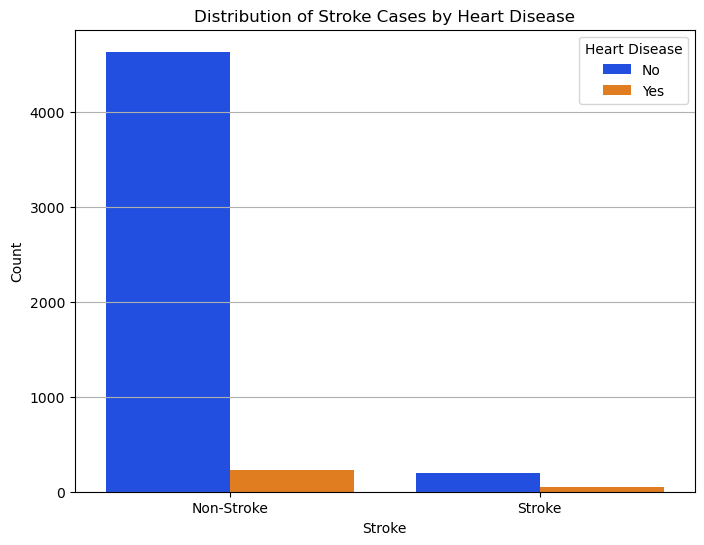

Heart Disease
0     4.178734
1    17.028986
Name: Stroke, dtype: float64


In [43]:
#print(df.columns);
plt.figure(figsize=(8, 6))
sns.countplot(x='Stroke', hue='Heart Disease', data=df, palette='bright')
plt.title('Distribution of Stroke Cases by Heart Disease')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.grid(axis='y')
plt.legend(title='Heart Disease', loc='upper right', labels=['No', 'Yes'])
plt.xticks(ticks=[0, 1], labels=['Non-Stroke', 'Stroke'])
plt.show()

# Calculate the percentage of individuals with heart disease for each employment type
heart_disease_percentages = df.groupby('Heart Disease')['Stroke'].mean() * 100

print(heart_disease_percentages)

While the number of individuals with heart disease who do not have stroke is higher overall, among those with stroke, there is a relatively greater proportion of individuals with heart disease compared to those without. Therefore it seems like hypertension does play a role in stroke.

Hypertension
0     3.967910
1    13.253012
Name: Stroke, dtype: float64


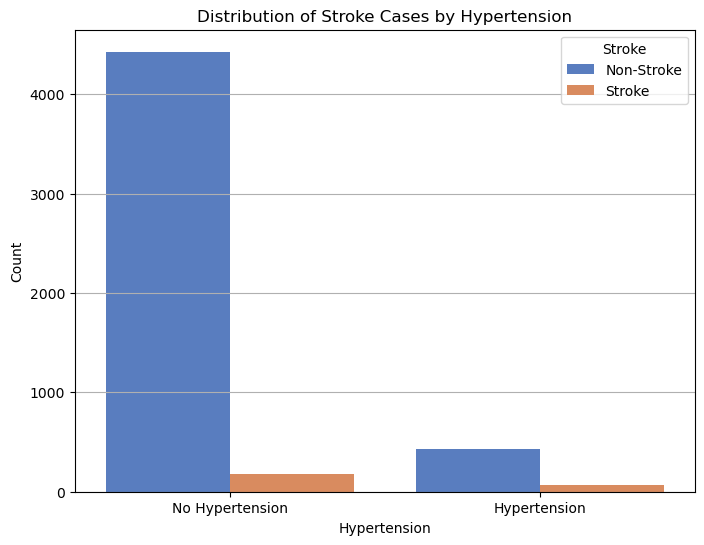

In [46]:
# Calculate the percentage of stroke cases for each hypertension status
#print(df.columns);
stroke_percentages = df.groupby('Hypertension')['Stroke'].mean() * 100

plt.figure(figsize=(8, 6))
sns.countplot(x='Hypertension', hue='Stroke', data=df, palette='muted')
plt.title('Distribution of Stroke Cases by Hypertension')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.grid(axis='y')
plt.legend(title='Stroke', loc='upper right', labels=['Non-Stroke', 'Stroke'])
plt.xticks(ticks=[0, 1], labels=['No Hypertension', 'Hypertension'])

print(stroke_percentages)

plt.show()

The graph of hypertension is similar to stroke. Although the majority of stroke occurrences are associated with individuals not having hypertension, relatively more stroke cases occur among those with hypertension.

Previously Married
0    1.650541
1    6.561288
Name: Stroke, dtype: float64


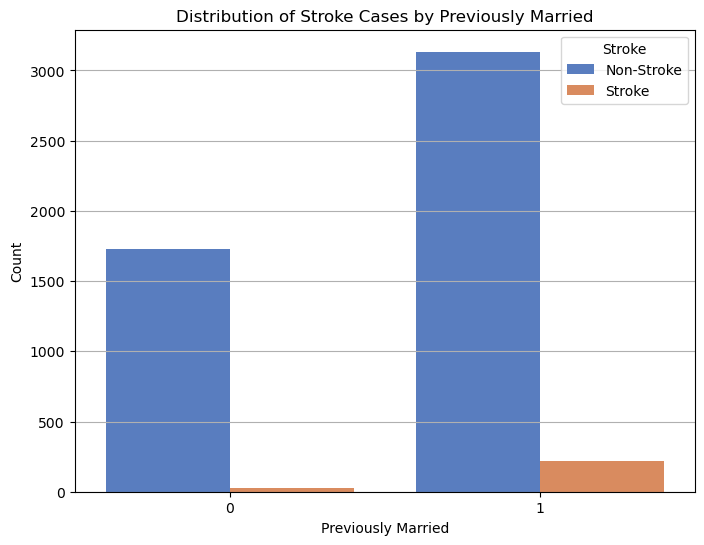

In [47]:
# Calculate the percentage of stroke cases for each previously married status
#print(df.columns);
stroke_percentages_married = df.groupby('Previously Married')['Stroke'].mean() * 100

plt.figure(figsize=(8, 6))
sns.countplot(x='Previously Married', hue='Stroke', data=df, palette='muted')
plt.title('Distribution of Stroke Cases by Previously Married')
plt.xlabel('Previously Married')
plt.ylabel('Count')
plt.grid(axis='y')
plt.legend(title='Stroke', loc='upper right', labels=['Non-Stroke', 'Stroke'])

print(stroke_percentages_married)

plt.show()

The graph depicts that most of the stroke cases occured in people who were previously married.

Residency
Rural    4.534606
Urban    5.200308
Name: Stroke, dtype: float64


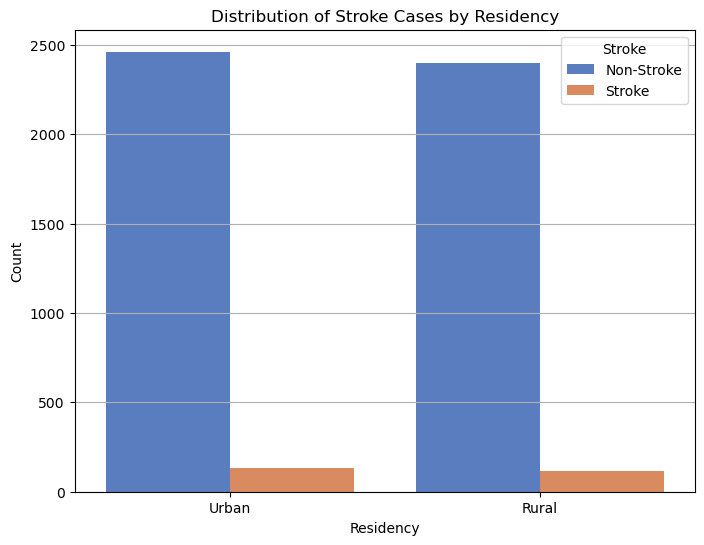

In [49]:
# Calculate the percentage of stroke cases for each residency status
#print(df.columns)
stroke_percentages_residency = df.groupby('Residency')['Stroke'].mean() * 100

plt.figure(figsize=(8, 6))
sns.countplot(x='Residency', hue='Stroke', data=df, palette='muted')
plt.title('Distribution of Stroke Cases by Residency')
plt.xlabel('Residency')
plt.ylabel('Count')
plt.grid(axis='y')
plt.legend(title='Stroke', loc='upper right', labels=['Non-Stroke', 'Stroke'])

print(stroke_percentages_residency)

plt.show()

There seems to be no major difference in the proportion of urban and rural residents when it comes to experiencing stroke. The number of cases are similar and the proportion of occurences also seem to be similar

Smoking Status
Unknown            3.044041
formerly smoked    7.909605
never smoked       4.756871
smokes             5.323194
Name: Stroke, dtype: float64


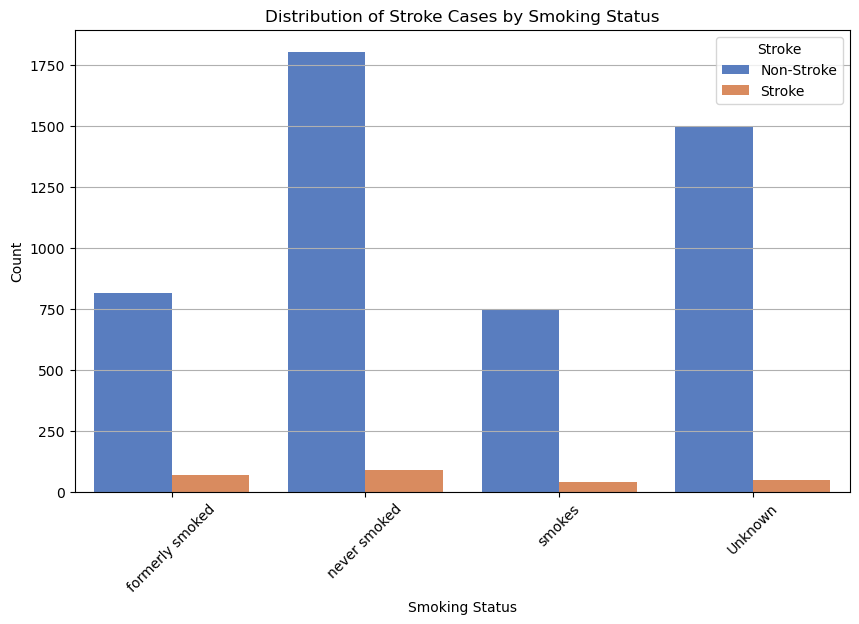

In [50]:
# Calculate the percentage of stroke cases for each smoking status
#print(df.columns)
stroke_percentages_smoking = df.groupby('Smoking Status')['Stroke'].mean() * 100

plt.figure(figsize=(10, 6))
sns.countplot(x='Smoking Status', hue='Stroke', data=df, palette='muted')
plt.title('Distribution of Stroke Cases by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.grid(axis='y')
plt.legend(title='Stroke', loc='upper right', labels=['Non-Stroke', 'Stroke'])
plt.xticks(rotation=45)

print(stroke_percentages_smoking)

plt.show()

It is somewhat unclear to see a relationship, but there are proportionally more stroke cases in formerly smoked compared to all the other smoking statuses.

Now that I have done data exploration, let's move onto step 4.

**Step 4: Model: Analysis, Hypothesis Testing, & ML**

In this phase, I will attempt to perform various modeling techniques (such as linear regression or logistic regression) on the set to obtain predictive data.

My first model will be a logistic regression. First, I can temporarily drop columns that won't be used in the model.

In [56]:
# Make a copy of df to have the linear regression run on
log_reg_df = df.copy()

# Drop columns that won't be used in the model
log_reg_df.drop(['Age Group', 'Glucose Level Group', 'BMI Category'], axis=1, inplace=True)

log_reg_df.head(3)

,id,Gender,Age,Hypertension,Heart Disease,Previously Married,Employment,Residency,Average Glucose Level,BMI,Smoking Status,Stroke
0,9046,Male,67.0,0,1,1,Private,Urban,228.69,36.60,formerly smoked,1
1,51676,Female,61.0,0,0,1,Self-employed,Rural,202.21,28.89,never smoked,1
2,31112,Male,80.0,0,1,1,Private,Rural,105.92,32.50,never smoked,1


Next, I will have to one-hot encode categorical variables. 

In [61]:
#one-hot encode categorical variables in the copy
log_reg_df = pd.get_dummies(log_reg_df, columns=['Gender', 'Employment', 'Residency', 'Smoking Status'])

KeyError: "None of [Index(['Gender', 'Employment', 'Residency', 'Smoking Status'], dtype='object')] are in the [columns]"

Next, I must gather the features and target variable from the dataframe. This will be done by saving my predictor variables (non-stroke columns) as 'X' and the results (stroke column) as 'y'.

In [ ]:
# Splitting the data into features (X) and target variable (y) using the modified copy
X = log_reg_df.drop('Stroke', axis=1)
y = log_reg_df['Stroke']

I will now use the Standard Scaler function from sklearn.preprocessing to remove the mean and scale X to unit variance. This simply generates z-scores for X, in place of the X value itself.

In [64]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

The data will now be split into train and test sets. This is necessary to assess the performance of the regression model on unseen data and to prevent overfitting by evaluating its generalization ability.

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

I can final create the model using functions from sklearn.

In [66]:
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

LogisticRegression()

In order to test my model's accuracy, I will utilize the test set created earlier and fit the model onto it. The accuracy metric will provide valuable insight into how well the model generalizes to new observations, and details how effective it can be moving forward.

In [67]:
# Predicting on the test set
y_pred = log_reg_model.predict(X_test)

# Evaluating the model
accuracy = log_reg_model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9393346379647749


My model returned an accuracy of ~94%. Next, I will look at how each predicting variable impacted the prediction. This will be done by observing the coefficients within the regression.

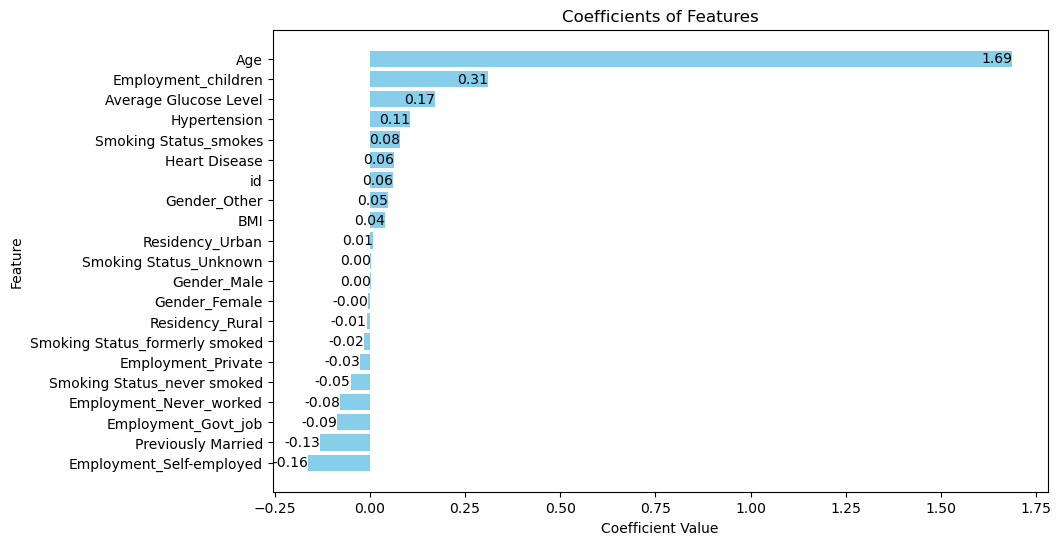

In [69]:
coefficients = log_reg_model.coef_[0]
feature_names = X.columns

# Sort coefficients and feature names by coefficient value
sorted_indices = coefficients.argsort()
sorted_coefficients = coefficients[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_coefficients, color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Coefficients of Features')

# Add coefficient values to the graph
for i, coef in enumerate(sorted_coefficients):
    plt.text(coef, i, f'{coef:.2f}', ha='right', va='center')

plt.show()

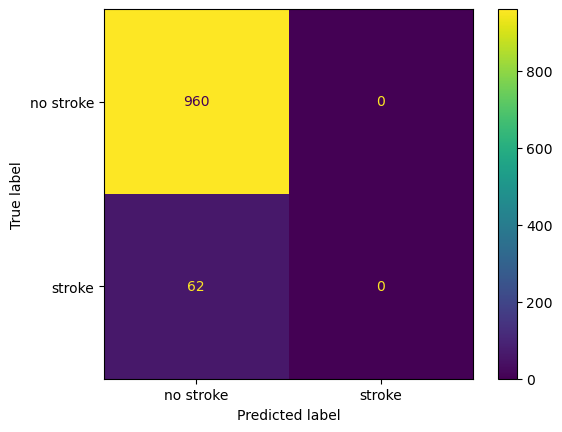

In [70]:
# Plotting confusion matrix
cm = confusion_matrix(y_test, y_pred, labels = log_reg_model.classes_)

cm_disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['no stroke', 'stroke'])

cm_disp.plot()

In [71]:
report = classification_report(y_test, y_pred)

print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



/Users/smithimahendran/Downloads/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/smithimahendran/Downloads/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/smithimahendran/Downloads/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

I observe that the model does well when predicting non stroke, but does extremely poorly when predicting stroke. I can tell from the classification report that I got none of the stroke predictions right. In reality, my model actually didn't predict any strokes at all and only predicted no stroke.

Additionally, since there is a class imbalance, I am going to want to pay attention to the macro average. Notice how the macro average is relatively low compared to the weighted average. That means the model isn't the best right now.

Lets try to fix that. This time instead of using pd.get_dummies, lets use sklearn's OneHotEncoder. 

In [72]:
df_copy.head(1)

,id,Gender,Age,Hypertension,Heart Disease,Previously Married,Employment,Residency,Average Glucose Level,BMI,Smoking Status,Stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


In [73]:
# Dropping one row because there is only one instance of the gender Other
df_copy.drop(df_copy.loc[df_copy['Gender'] == 'Other'].index, inplace = True)

# Need to reset index after dropping the one row
df_copy.reset_index(drop=True, inplace=True)

# One-hot encode the selected categorical columns
ohe = OneHotEncoder()
feature_arr = ohe.fit_transform(df_copy[['Gender', 'Previously Married', 'Employment', 'Smoking Status', 'Residency']]).toarray()
feature_labels = ohe.get_feature_names_out()
to_add = pd.DataFrame(feature_arr, columns = feature_labels)

# Select the columns to concatenate with to_add
selected_cols = df_copy[['Age', 'Hypertension', 'Heart Disease', 'Average Glucose Level', 'BMI']]

# Concatenate selected columns with to_add
df_one_hot = pd.concat([selected_cols, to_add], axis=1)

# Add the 'stroke' column from df_copy to df_one_hot
df_one_hot['Stroke'] = df_copy['Stroke']

df_one_hot.head(3)

,Age,Hypertension,Heart Disease,Average Glucose Level,BMI,Gender_Female,Gender_Male,Previously Married_No,Previously Married_Yes,Employment_Govt_job,...,Employment_Private,Employment_Self-employed,Employment_children,Smoking Status_Unknown,Smoking Status_formerly smoked,Smoking Status_never smoked,Smoking Status_smokes,Residency_Rural,Residency_Urban,Stroke
0,67.0,0,1,228.69,36.60,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
1,61.0,0,0,202.21,28.89,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
2,80.0,0,1,105.92,32.50,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1


In [74]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Select the columns to scale
columns_to_scale = ['Age', 'Hypertension', 'Heart Disease', 'Average Glucose Level', 'BMI']

# Fit the scaler to the selected columns
scaler.fit(df_one_hot[columns_to_scale])

# Transform the selected columns
scaled_features = scaler.transform(df_one_hot[columns_to_scale])

# Replace the original columns with the scaled ones in the DataFrame
df_one_hot[columns_to_scale] = scaled_features

df_one_hot.head(3)

,Age,Hypertension,Heart Disease,Average Glucose Level,BMI,Gender_Female,Gender_Male,Previously Married_No,Previously Married_Yes,Employment_Govt_job,...,Employment_Private,Employment_Self-employed,Employment_children,Smoking Status_Unknown,Smoking Status_formerly smoked,Smoking Status_never smoked,Smoking Status_smokes,Residency_Rural,Residency_Urban,Stroke
0,1.051242,-0.328637,4.184599,2.706450,1.001057,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
1,0.785889,-0.328637,-0.238972,2.121652,-0.000569,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
2,1.626174,-0.328637,4.184599,-0.004867,0.468415,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1


In [75]:
x2 = df_one_hot.drop('Stroke', axis=1)
y2 = df_one_hot['Stroke']
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size= 0.2, random_state= 0)

print("x2_train dataset: ", x2_train.shape)
print("y2_train dataset: ", y2_train.shape)
print("x2_test dataset: ", x2_test.shape)
print("y2_test dataset: ", y2_test.shape)

x2_train dataset:  (4087, 20)
y2_train dataset:  (4087,)
x2_test dataset:  (1022, 20)
y2_test dataset:  (1022,)


In [79]:
#Oversampling with smote
oversample = SMOTE()
x_train_os, y_train_os = oversample.fit_resample(x2_train, y2_train)
print(pd.Series(y2_train).value_counts())
print(pd.Series(y_train_os).value_counts())

Stroke
0    3892
1     195
Name: count, dtype: int64
Stroke
0    3892
1    3892
Name: count, dtype: int64


In [80]:
log_reg_model_ovsmp = LogisticRegression()
log_reg_model_ovsmp.fit(x_train_os, y_train_os)

LogisticRegression()

In [81]:
# Predicting on the test set
y2_pred = log_reg_model_ovsmp.predict(x2_test)

report = classification_report(y2_test, y2_pred)

print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.77      0.86       968
           1       0.15      0.72      0.25        54

    accuracy                           0.77      1022
   macro avg       0.56      0.75      0.56      1022
weighted avg       0.94      0.77      0.83      1022



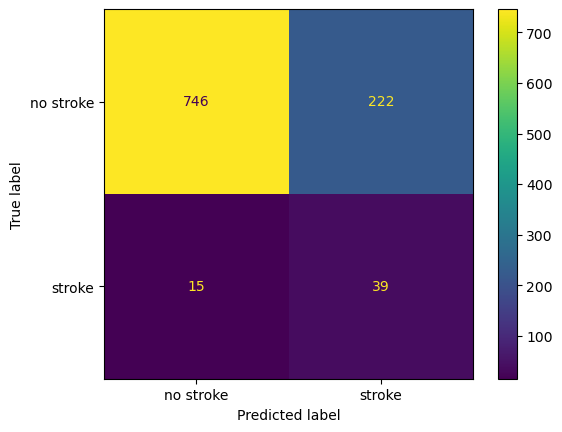

In [82]:
# Plotting confusion matrix
cm = confusion_matrix(y2_test, y2_pred, labels = log_reg_model_ovsmp.classes_)

cm_disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['no stroke', 'stroke'])

cm_disp.plot()

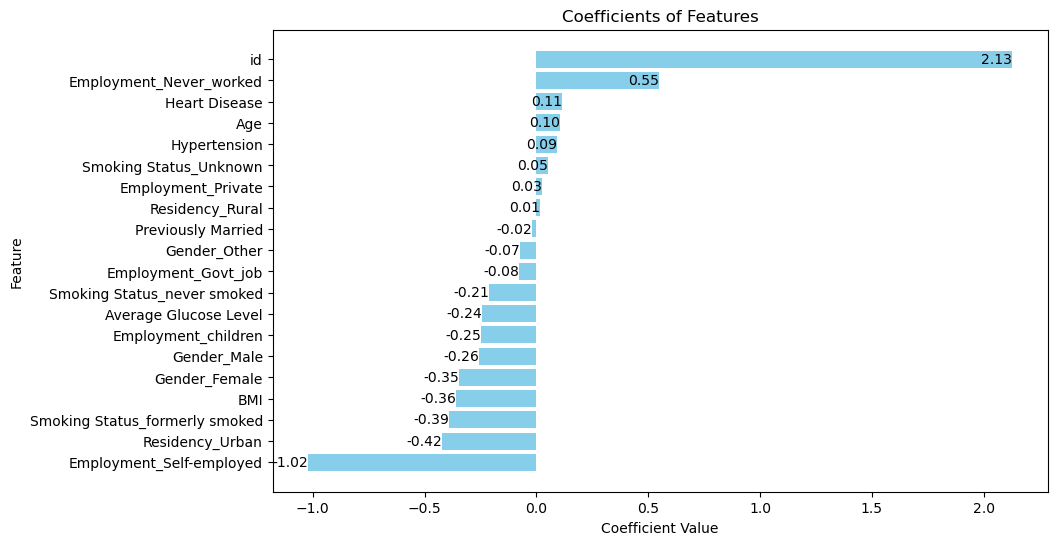

In [83]:
coefficients = log_reg_model_ovsmp.coef_[0]
feature_names = X.columns

# Sort coefficients and feature names by coefficient value
sorted_indices = coefficients.argsort()
sorted_coefficients = coefficients[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_coefficients, color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Coefficients of Features')

# Add coefficient values to the graph
for i, coef in enumerate(sorted_coefficients):
    plt.text(coef, i, f'{coef:.2f}', ha='right', va='center')

plt.show()

Best Hyperparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.77      0.86       968
           1       0.15      0.72      0.24        54

    accuracy                           0.76      1022
   macro avg       0.56      0.74      0.55      1022
weighted avg       0.94      0.76      0.83      1022



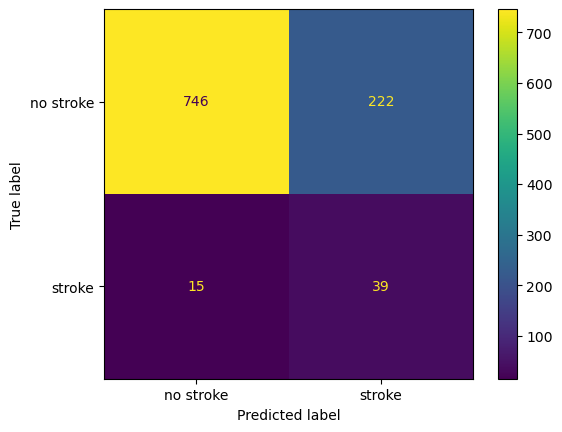

In [84]:
# Define the logistic regression model
logistic_regression = LogisticRegression()

# Define the hyperparameters and their values to search over
param_grid = {
    'C': np.linspace(0.001, 0.01, 10),  # Regularization strength
    'penalty': ['l1', 'l2'],               # Penalty type
    'solver': ['liblinear', 'saga']        # Solver algorithm
}

# Initialize GridSearchCV
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='roc_auc')

# Perform grid search to find the best hyperparameters
grid_search.fit(x_train_os, y_train_os)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Predicting on the test set
y3_pred = best_model.predict(x2_test)

report = classification_report(y2_test, y3_pred)

print("Classification Report:\n", report)

# Plotting confusion matrix
cm = confusion_matrix(y2_test, y2_pred, labels = log_reg_model_ovsmp.classes_)

cm_disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['no stroke', 'stroke'])

cm_disp.plot()

Seems like the hyper tunning did not lead to major improvements as I may be limited by the data or my hyper tunning was not good enough.

To further analyze my data from this regression, I can use a random forest classifier model on the dataset to determine which predictors are the most important. I will use estimators of size 100 and gini criterion, which represents Gini Impurity.

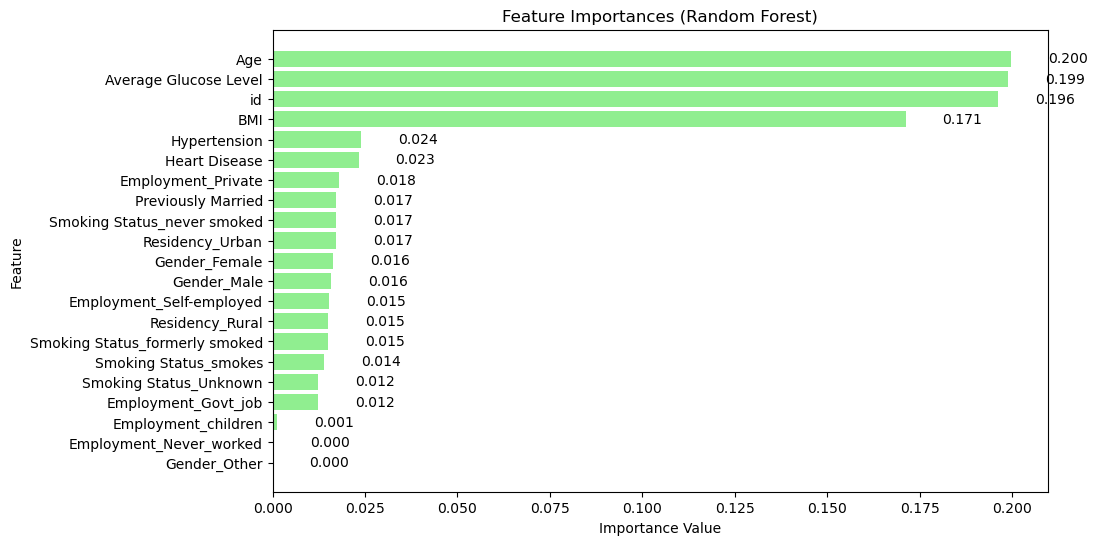

In [85]:
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the entire dataset
rf_model.fit(X_scaled, y)

# Get feature importances from the trained model
feature_importances = rf_model.feature_importances_

# Match feature importances with feature names
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort in ascending order
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=False)

# Extract sorted feature names and importance values
sorted_feature_names = [pair[0] for pair in sorted_feature_importances]
sorted_importance_values = [pair[1] for pair in sorted_feature_importances]

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(sorted_feature_names, sorted_importance_values, color='lightgreen')

# Display the importance values on the bars
for bar, value in zip(bars, sorted_importance_values):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, f'{value:.3f}',
             va='center', ha='left', color='black')

plt.xlabel('Importance Value')
plt.ylabel('Feature')
plt.title('Feature Importances (Random Forest)')

# Show plot
plt.show()

Based on the results of the random forest classifier model, I can see that far and away, Average Glucose Level, Age, and BMI are the most important predictors of stroke. Combined, These three equate to 74% of the combined importance values. Some of the least important features include gender, employment, and smoking status in general. The model generally tends to tell me that medical conditions and age are the strongest and most important predictors of stroke.

Let's look at a K-Nearest Neighbors machine learning model applied to my code.
First, I'll initialize two variables to store the top 5 most accurate models.

In [86]:
# Initialize arrays
top_combinations = []
top_accuracies = []

Now, I will loop through k-values 1-20, creating a KNN model and then fitting it on the trainset. In the same iteration, I will compare it to the test set and store the accuracy metric.

In [88]:
# Loop through different values of n_neighbors
for n_neighbors in range(1, 20):
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)
    accuracy_knn = knn_model.score(X_test, y_test)
    top_combinations.append((n_neighbors, accuracy_knn))
    top_accuracies.append(accuracy_knn)

Now, I will return the top 5 most accurate k-values.

In [89]:
# Sort the combinations
top_combinations = sorted(top_combinations, key=lambda x: x[1], reverse=True)
top_5_combinations = top_combinations[:5]

# Print the top 5 combinations
print("Top 5 combinations of neighbors and accuracy:")
for combination in top_5_combinations:
    print("Neighbors:", combination[0], "- Accuracy:", combination[1])

Top 5 combinations of neighbors and accuracy:
Neighbors: 4 - Accuracy: 0.9403131115459883
Neighbors: 7 - Accuracy: 0.9403131115459883
Neighbors: 8 - Accuracy: 0.9403131115459883
Neighbors: 10 - Accuracy: 0.9403131115459883
Neighbors: 11 - Accuracy: 0.9403131115459883


After testing 20 possible k-values for this model, I've determined the top 5 numbers all result in an accuracy of ~94.03%. K-values 4, 8, 9, 10, 11 are all about equally accurate.

Lets do this again, but on the smote data.

In [90]:
# Initialize arrays
top_combinations = []
top_accuracies = []

# Loop through different values of n_neighbors
for n_neighbors in range(1, 20):
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_model.fit(x_train_os, y_train_os)
    y_pred_knn = knn_model.predict(x2_test)
    accuracy_knn = knn_model.score(x2_test, y2_test)
    top_combinations.append((n_neighbors, accuracy_knn))
    top_accuracies.append(accuracy_knn)

# Sort the combinations
top_combinations = sorted(top_combinations, key=lambda x: x[1], reverse=True)
top_5_combinations = top_combinations[:5]

# Print the top 5 combinations
print("Top 5 combinations of neighbors and accuracy:")
for combination in top_5_combinations:
    print("Neighbors:", combination[0], "- Accuracy:", combination[1])

Top 5 combinations of neighbors and accuracy:
Neighbors: 2 - Accuracy: 0.8874755381604696
Neighbors: 1 - Accuracy: 0.8796477495107632
Neighbors: 4 - Accuracy: 0.850293542074364
Neighbors: 3 - Accuracy: 0.8356164383561644
Neighbors: 6 - Accuracy: 0.8258317025440313


**Step 5: Interpretation: Insight & Policy Decision**

From my code, I am able to come to the conclusion that age plays the biggest factor in stroke. I am also able to conclude that BMI, hypertension, heartdisease, and average glucose level all have a positive correlation with stroke. All the other features, such as residency, previously married, and employment type, don't play as big as a role compared to the important features in predicting stroke.

I was able to create two models for logistic regression. One had an accuracy of ~94% and the other model had an accuracy of ~77%. While the first model may seem better, it had terrible precision and recall for the stroke class. The second model is much better even though it has low precision, but mediocre recall and accuracy. I have already concluded that is okay to have a high false positive rate as it is better to be overly cautious than carefree. A false positive rate in the senario of detecting stroke is much better than a false negative.

The only real way to improve the accuracy of the model would be to gather better data. More specifically, gather better data for stroke positive. It is hard for the model to pick up patterns in stroke if majority of the data is non stroke. It could be possible to gather stroke data from a different source and then intergrate it with the current dataset. Additionally, I could have also tried undersampling and doing a better job of tunning some hyper-parameters.

Moving forward, this data analysis could be used in medical devices to help predict stroke. The medical device would gather medical data, which would then be used to predict stroke. Being able to prevent the onset of stroke would be very beneficial to the United States as well as many other countries as stated in the introduction.

In [94]:
!jupyter nbconvert --to html StrokeDetectionAnalysis.ipynb.ipynb

[NbConvertApp] WARNING | pattern 'StrokeDetectionAnalysis.ipynb.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=T